# The Fourier Transform and Convolution Integrals

The convolution of two functions $f$ and $g$ is an integral transformation defined as

$$
(f*g)(x) \equiv \int_{-\infty}^{\infty}f(\xi)g(x - \xi) d\xi = \int_{-\infty}^{\infty}f(x-\xi)g(x) d\xi
$$


Recall that the fourier tranform of an integrable function $f(x)$ is defined as 

$$
\hat{f}{(\omega)} \equiv \mathcal{F}(f) = \int_{-\infty}^{\infty} f(x)e^{-i\omega x} dx
$$

and the inverse Fourier transform given by  
$$
f(x) = \mathcal{F}(\hat{f})= \frac{1}{2\pi}\int_{-\infty}^{\infty} \hat{f}{(\omega)} e^{i\omega x} d\omega
$$

If $f(x)$ and $g(x)$ are integrable functions with Fourier transforms $\hat{f}(\omega)$ and $\hat{g}(\omega)$ respectively, then the Fourier transform can provide a computationally efficient way to calculate the convolution. In practice, this becomes numerically efficient for larger signals. 

We can show that convolution in the original domain is equivalent to multiplication in the Fourier domain. This is known as the **convolution theorem**.

## Convolution Theorem
$$
\mathcal{F}(f*g) = \mathcal{F}(f)\mathcal{F}(g)
$$
### Proof
$$
\begin{aligned}
\mathcal{F}^{-1}(\hat{f}\hat{g})(x) 
&=\frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega)\hat{g}(\omega) e^{-i \omega x} d\omega\\
&=\frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega) \left[\int_{-\infty}^{\infty}g(y)e^{-i\omega y}dy\right] e^{i\omega x}d\omega \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega) \left[\int_{-\infty}^{\infty}g(y)e^{i\omega(x-y)}dy\right] d\omega \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega) \int_{-\infty}^{\infty} g(y)e^{i\omega(x-y)} d\omega dy \\
&= \int_{-\infty}^{\infty} g(y) \frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega) e^{i\omega(x-y)} d\omega dy \\
&= \int_{-\infty}^{\infty}g(y)f(x - y) dy \\
&= (f*g)(x)
\end{aligned}
$$





In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Manual convolution with FFT
def fft_convolve(f1, f2, mode = "full"):  
    """Convolve two signals using FFT

    Args:
        f1 (np.array): 1-d array. Signal 1
        f2 (np.array): 1-d array. Signal 2
        mode (str, optional): _description_. Defaults to "full".

    Returns:
        array: 1-d array containing the convolution between f1 and f2
    """
    import numpy as np

    _modedict = {'same': 1, 'full': 2}
    try:
        _ = _modedict[mode]
    except KeyError as e:
        raise ValueError("Acceptable mode flags are "
                         " 'same' or 'full'.") from e

    # Compute the size of the full output signal
    full_size = len(f1) + len(f2) - 1
    
    # Compute the next power of 2 geq output size
    fft_size = 2 ** int(np.ceil(np.log2(full_size)))
    
    # FFT of each signal
    fft_f1 = np.fft.fft(f1, fft_size)
    fft_f2 = np.fft.fft(f2, fft_size)
    
    # Take Element-wise multiplication in the frequency domain and inverse FFT
    convolved = np.fft.ifft(fft_f1 * fft_f2)
    convolved = convolved[:full_size]

    if mode == "same":
        output_size = max(len(f1), len(f2))
        trunc = (full_size - output_size)//2
        convolved = convolved[trunc:-trunc]
        # Truncate if output should be odd
        if output_size%2==0:
            convolved=convolved[:-1]

    # else mode == "full"
    
    return np.real(convolved)


# Hat function
def hat(n1,n2,n3):
    n = n1 + n2 + n3
    return np.concatenate([np.zeros(n1), np.ones(n2), np.zeros(n3)])  

# Plotting function
def plot_row(*args, extent=None, cmap='virids'):
    fig, axes = plt.subplots(1, len(args), figsize=(6*len(args), 5))
    for ax, arg in zip(axes, args):
        a = ax.plot(arg[0])
        ax.set_xlabel("$x$")
        ax.set_ylabel("$y$")
        ax.set_title(arg[1])
    fig.tight_layout()

In [18]:

# Define signals to convolve
s1 = hat(10,10,10)
s2 = hat(10,10,10)

mode = "same"

# Perform manual convolution with FFT
s3 = fft_convolve(s1, s2, mode)
# Numpy non-FFT convolution
s4 = np.convolve(s1,s2, mode)
# Scipy FFT-based convolution
s5 = signal.fftconvolve(s1,s2,mode)

# Check differences between standard implementations
print("manual - numpy: {}".format(np.max(np.abs(s3 - s4))))
print("manual - scipy: {}".format(np.max(np.abs(s3 - s5))))
    


manual - numpy: 1.7763568394002505e-15
manual - scipy: 1.7763568394002505e-15


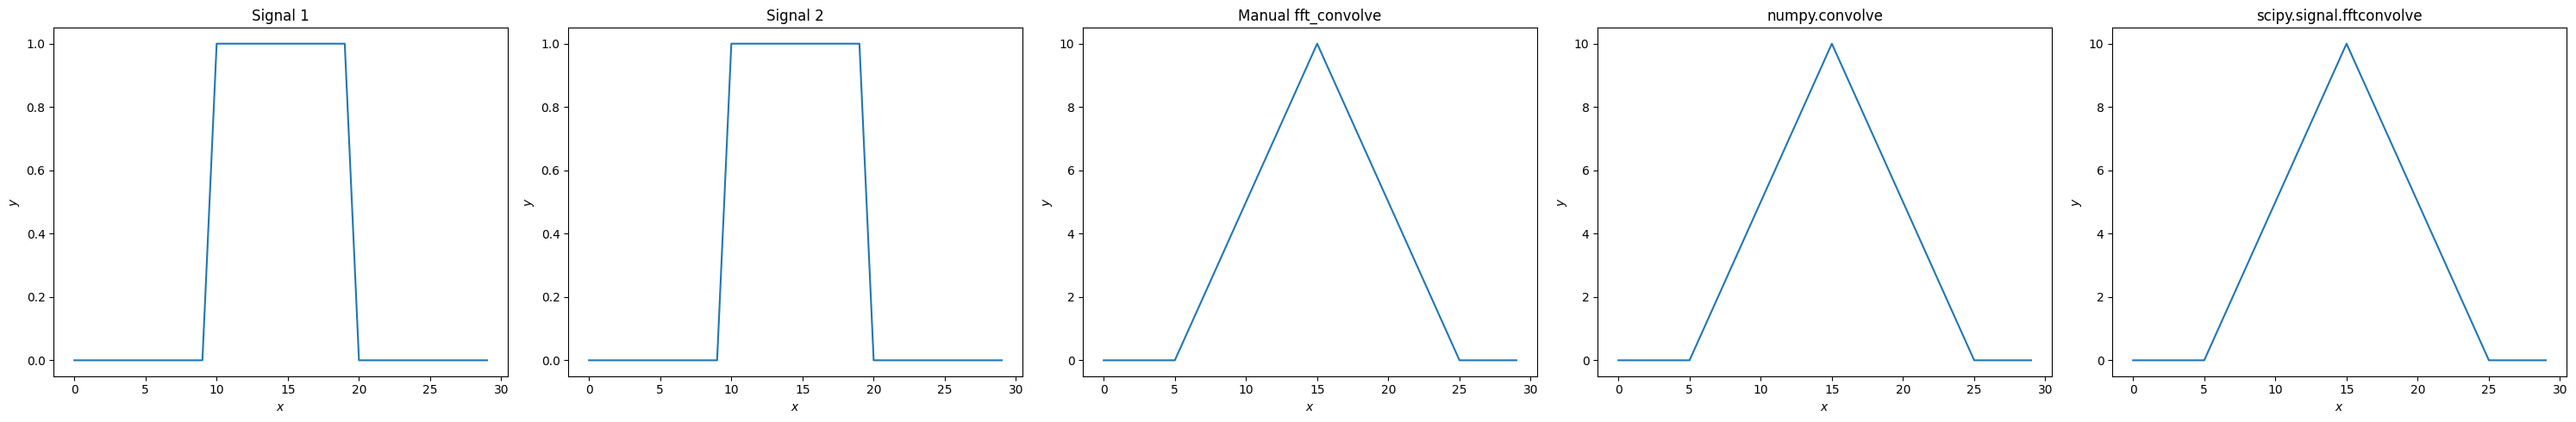

In [19]:
plot_row((s1, 'Signal 1'),
             (s2, 'Signal 2'),
             (s3, 'Manual fft_convolve'),
             (s4, 'numpy.convolve'),
             (s5, 'scipy.signal.fftconvolve'))